<center>
# Simuation de lois

# Exercice 1 - Simulation de lois de Bernoulli et de lois binomiales

In [1]:
%matplotlib inline
import numpy as  np   
import scipy as sp
from pylab import *

On rappelle qu'une variable de Bernoulli de paramètre $p$ prend la valeur $1$ avec la probabilité $p$, et $0$ avec la probabilité $(1-p)$.

Une variable binomiale de paramètres $(n,p)$ peut être vue comme la somme de $n$ v.a. indépendantes de loi de Bernoulli de paramètre $p$.

<p style="border:2px; border-style:solid; padding: 0.5em;border-color:#287EC7"> 
En utilisant des [variables uniformes](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.uniform.html) sur $[0,1]$, construire une fonction <code>bernp()</code> qui renvoie $n$ variables de Bernoulli indépendantes de paramètre $p$ .
Vérifier graphiquement le bon fonctionnement de cette fonction. On pourra s'inspirer de [cet exemple](https://matplotlib.org/gallery/specialty_plots/system_monitor.html#sphx-glr-gallery-specialty-plots-system-monitor-py).
<p>

NameError: name 'Prop' is not defined

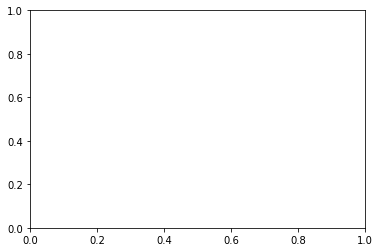

In [13]:
def bernp(n,p):
    s= np.random.uniform(0.0, 1.0, n)
    s= (s<=p)    
    return s.astype(int)

fig, ax = plt.subplots()
bar(np.arange(2), Prop, color='r')


<p style="border:2px; border-style:solid; padding: 0.5em;border-color:#287EC7"> 
Construire une fonction <code>binnp1</code> qui renvoie une variable binomiale de paramètres $n$ et $p$.
<p>

In [14]:
def binnp1(n, p):
    X = bernp(n,p)
    return X.sum()

In [17]:
binnp1(100, .5)

57

<p style="border:2px; border-style:solid; padding: 0.5em;border-color:#287EC7"> 
Construire enfin une fonction <code>binnpk</code> qui renvoie $k$ variables binomiales indépendantes de paramètres $n$ et $p$. Vérifier graphiquement le bon fonctionnement de cette fonction.  
<p>

In [18]:
def binnpk(k, n, p):
    X = np.random.uniform(0, 1, (k,n))
    X = (X < p) *1
    return X.sum(axis=1)
    

<p style="border:2px; border-style:solid; padding: 0.5em;border-color:#287EC7"> 
Lorsque $n \rightarrow \infty$ et $np \rightarrow \lambda$ (et donc $p \rightarrow 0$), on sait que la loi Binomiale de paramètres $n$ et $p$ converge en loi vers une loi de Poisson de paramètre $\lambda$.   
- Générer $N_{sim}=1000$ réalisations indépendantes d'une loi binomiale de paramètres $n$ et $p$.   
- Représentez l'histogramme de l'échantillon ainsi obtenu.   
- Superposez sur ce dernier les valeurs des probabilités [d'une loi binomiale](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.binom.html) de paramètre $n$ et $p$ ainsi que les valeurs des probabilités d'une [loi de Poisson]() de paramètre $np$.  
- Représenter ces graphiques pour (n,p) = (10,1/2), (50,1/10), (100, 1/20) et (200, 1/40).  
- Commentez les résultats obtenus.  
</p>

In [22]:
from scipy.stats import binom, poisson, norm

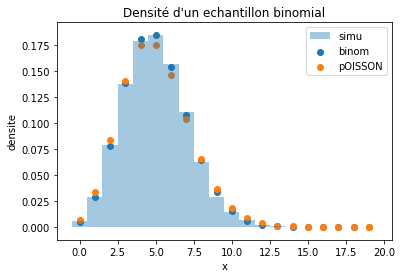

In [25]:
n = 50
p = .1

X = binnpk(10000, n, p)
hist(X, normed = 1, alpha = .4, bins = arange(-.5, 20.5), label="simu");
xlabel('x');
ylabel("densite")
title("Densité d'un echantillon binomial")
scatter(arange(20), binom.pmf(arange(20),n,p), label='binom');
scatter(arange(20), poisson.pmf(arange(20),n*p), label='pOISSON');
legend();

<p style="border:2px; border-style:solid; padding: 0.5em;border-color:#287EC7"> 
Lorsque $p$ est fixé et $n$ grand, par quelle loi peut-on approcher la loi binomiale de paramètres $n$ et $p$ ?   
Illustrer cette convergence en procédant comme dans la question précédente.
</p>

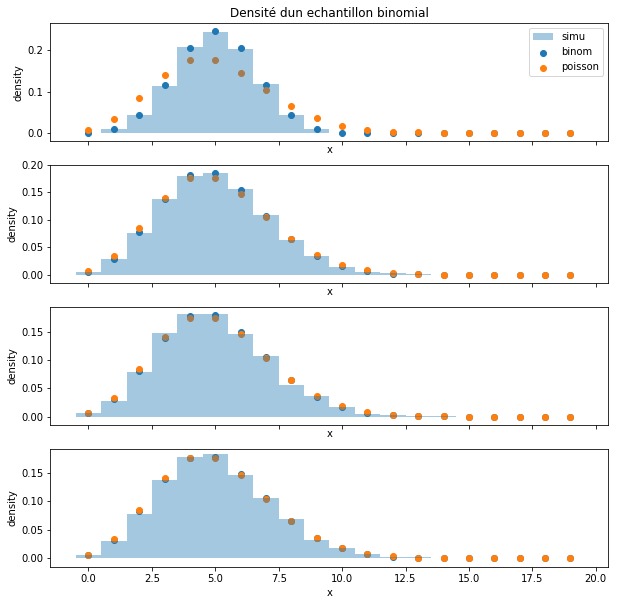

In [28]:
nvec = [10,50,100,200]
pvec = [.5,.1,1/20,1/40]

f, axarr = plt.subplots(4, figsize=(10,10), sharex=True)

for i in arange(4):
    X= binnpk(10000,nvec[i],pvec[i]);
    axarr[i].hist(X,normed=1,alpha=.4,bins=arange(-.5,20.5),label="simu");
    axarr[i].set_xlabel('x');
    axarr[i].set_ylabel('density');
    axarr[i].scatter(arange(20), binom.pmf(arange(20),nvec[i],pvec[i]), label='binom');
    axarr[i].scatter(arange(20), poisson.pmf(arange(20),nvec[i]*pvec[i]), label='poisson');
    
    axarr[0].set_title("Densité dun echantillon binomial");
    axarr[0].legend();

## Exercice 2 - Simulation d'une loi triangulaire par la méthode d'inversion
On considère la loi de densité triangulaire $f$ suivante:
$$ f(x)=0,\, \text{si}\, x\leq 0 $$
$$ f(x)=x,\, \text{si}\, x \in ]0,1]$$
$$ f(x)=2-x,\, \text{si}\, x\in ]1,2]$$
$$ f(x)=0,\, \text{si}\, x \geq 2$$

<IMG SRC="densite.png" ALT="densité triangulaire" WIDTH=400 HEIGHT=400>

<p style="border:2px; border-style:solid; padding: 0.5em;border-color:#287EC7"> Utilisez la méthode d’inversion pour simuler des variables aléatoires dont la loi a pour densité la fonction triangulaire f définie ci-dessus. Vérifiez graphiquement que la loi des variables aléatoires obtenues correspond bien à celle de la densité f.
</p>

In [76]:
def densité_f(x):
    
    return 0*np.logical_or((x <= 0), (x > 2)) + x*np.logical_and((x > 0),(x <= 1)) + (2 - x)*np.logical_and((x > 1), (x <= 2))
    
def repart_f(x):
    
    return 0*(x <= 0) + 1*(x>2) + (np.power(x, 2)/2)*np.logical_and((x > 0),(x <= 1)) + (2*x-np.power(x, 2)/2 - 1)*np.logical_and((x > 1),(x <= 2))

def F_recip(y):
    return np.sqrt(2.*y)*(y>=0)*(y<=1/2)+(2-np.sqrt(2*(1-y)))*(y<=1)*(y>1/2)

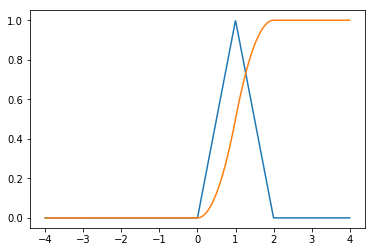

In [77]:
plot(linspace(-4,4,1000), densité_f(linspace(-4,4,1000)))
plot(linspace(-4,4,1000), repart_f(linspace(-4,4,1000)))

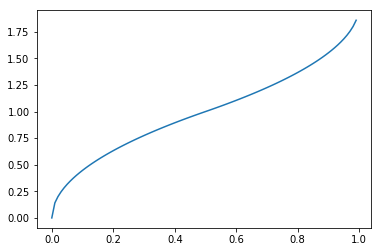

In [78]:
y= np.arange(0,1,.01)
plt.plot(y,F_recip(y))

In [79]:
X = np.random.uniform(0,1,10000)
Y=F_recip(X)

Verification graphique

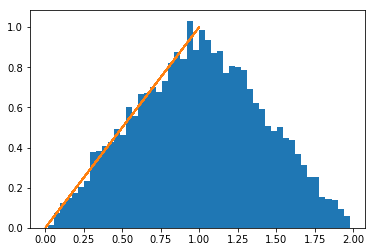

In [80]:
plt.hist(Y, bins=50,normed=1);
plt.plot(X, densité_f(X));

## Exercice 3 - Simulation de la lois gamma par l'algorithme d'Ahrens et Dieters 

Cet exercice a pour objectif de simuler des variables aléatoires $\Gamma(a,b)$ avec $a,b>0$ quelconques, sans utiliser [numpy.random.gamma](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.gamma.html) évidemment. On sait (c.f. le cours) que ce probléme se raméne essentiellement à simuler une loi $\Gamma(a,1)$ avec $a < 1$. On note 
\begin{equation*}
f(x,a)=\frac{1}{\Gamma(a)} e^{-x} x^{a-1} \mathbb{1}_{[0,+\infty[}(x)
\end{equation*}

a densité de le loi $\Gamma(a,1)$.
Pour simuler selon cette loi (avec $a < 1$ fixé), on va appliquer une méthode de rejet en utilisant comme enveloppe la loi de densité sur $\mathbb{R}$

\begin{equation*}
g(x,a)=\frac{ae}{a+e}\left(x^{a-1} \mathbb{1}_{]0,1[}(x)+ e^{-x}\mathbb{1}_{[1,+\infty[}(x)\right).
\end{equation*}

En effet, on peut montrer que pour $c=(a+e)/(a e \Gamma(a))$, on a alors $ f(x,a) \leq c g(x,a)$ pour tout $x \in \mathbb{R}$. Puisque l'on sait simuler des variables aléatoire de densité $g$ (voir plus bas), il est donc possible de simuler des variables aléatoires de densité $f$ par la méthode de rejet dont on rappelle l'algorithme ci-dessous :



** Algorithme de rejet :**
- 1: Simuler :
 - $X$ de densité $g(\cdot,a)$ ;
 - $U$ de loi $\mathcal{U}([0,1])$ (indépendente de $X$) ;
- 2: Si $( c g(X,a)  U >  f(X,a) )$ 
 - Alors retourner en 1 (rejet) ; 
 - Sinon accepter $X$ comme un tirage aléatoire de densité de probabilité $f(\cdot,a)$.

In [ ]:
%matplotlib inline
import numpy as np  
import matplotlib.pyplot as plt
import numpy.random as rd 
import scipy as sp
import scipy.special as spc

### 1- Représentation de la densité $f$ et de son enveloppe


- Créer deux fonction `f` et `g`  de paramètres $x$ et $a$ pour les deux densités définies plus haut.

- Tracer la densité $f$ et la courbe de la fonction $c g$.

### 2- Simulation selon la loi de densité $g$

On note $G(\cdot,a)$ la fonction de répartition associée à la densité $g(\cdot,a)$.

- Écrire une fonction `Ginv`, dépendant de $z$ et $a$, qui renvoie l'inverse de la fonction $G(\cdot,a)$ :
\begin{equation*}
Ginv(z,a)=\left(\frac{a+e}{e} z\right)^{1/a} \mathbb{1}_{(z < \frac{e}{a+e})}-\log\left(\frac{a+e}{a e}(1- z)\right)\mathbb{1}_{(z \geq \frac{e}{a+e})} \:†.
\end{equation*}

- En utilisant la méthode d'inversion, créer un fonction `gLoi` permettant de simuler un échantillon de taille $n$ de variables aléatoire indépendantes de densité $g(\cdot,a)$. 

- Vérifiez graphiquement que la loi des variables aléatoires obtenues correspond bien à celle de la densité $g$.

### 3- Méthode de rejet  pour $a <1$  

- Définir une fonction `gamrej`, dépendant de
$n$ et de $a$, qui renvoie pour tout $a < 1$ un vecteur de $n$ nombres
aléatoires tirés suivant la loi $\Gamma(a,1)$. 

- Vérifiez graphiquement que la loi des variables aléatoires obtenues correspond bien é celle de la densité $\Gamma(a,1)$.

 ### 4- Efficacité de l'algorithme de rejet
 
 On souhaite évaluer "l'efficacité" de l'algorithme de rejet selon
  l'enveloppe $g(\cdot,a)$ choisie.
  
- Modifier la fonction  `gamrej `pour obtenir aussi en  sortie un vecteur de taille $n$ donnant, pour chaque  variable
  aléatoire tirée selon la loi $\Gamma(a,1)$, le nombre d'essais qui a été nécessaire (i.e le nombre de passages dans la boucle avant une réussite).

 - Quelle est la loi du nombre d'essais nécessaire pour simuler une variable selon la loi $\Gamma(a,1)$ ? Vérifier  graphiquement votre réponse

On propose d'utiliser l'algorithme de rejet avec une seconde enveloppe  :
  \begin{equation*}
  g_2(x,a)=\frac{a}{a+1}\left(x^{a-1} \mathbb{1}_{]0,1[}(x)+
  \frac{1}{x^2}\mathbb{1}_{[1,+\infty[}(x)\right). 
  \end{equation*}
 
 - Vérifiez que $g_2$ est une densité et trouver une constante $c_2$ telle que  $
  f(x,a) \leq c_2 g_2(x,a)$ pour tout $x \in \mathbb{R}$.
  
- Sur un même graphique, tracer la densité $f$, la fonction $c g$ et  la fonction $c_2 g_2$. 

- Pour simuler une loi $\Gamma(a,1)$ par la méthode du rejet, laquelle des deux enveloppes $c_2 g_2$ et  $c g$ est-il préférable de choisir ?

- Créer une fonction permettant de simuler une  variable aléatoire de densité $g_2(\cdot,a)$ en utilisant la méthode  d'inversion. 

- Définir une fonction `gamrej2`, similaire à la fonction
  `gamrej`,  pour simuler un vecteur de $n$ nombres aléatoires tirés
  suivant la loi $\Gamma(a,1)$. 

- Vérifiez graphiquement que la loi des variables aléatoires obtenues correspond bien à celle de la densité $\Gamma(a,1)$.

- Comparer l'efficacité des algorithmes de rejet lorsqu'on utilise les enveloppes $g$   et $g2$. 

### 5-Simulation de lois exponentielles

- En utilisant  la méthode d'inversion, écrire une fonction `expo` d'arguments de paramètre $l$ et un entier $n$, qui renvoie $n$ variables exponentielle de paramètre $l$. 

### 6- Simulation de lois Gamma dans le cas général

- En utilisant  la fonction `expol`, définir une fonction `gamp` d'arguments $n\in \mathbb{N}$ et  $p \in \mathbb{N}$, qui renvoie $n$ réalisations de la loi Gamma(n,p).

- En utilisant les fonctions `gamrej` et `gamp`, définir une fonction `gamma_gen` d'arguments $n\in \mathbb{N} $, $a>0$ et $b>0$, qui renvoie $n$ réalisations de la loi Gamma(a,b).

- Vérifier graphiquement que les variables simulées ont bien la loi souhaitée.